In [1]:
from utils.converters import df_to_XY
from utils.readers import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Read data
## M&A Volume

In [9]:
def reconfigure_vol_df(df):
    df['Date'] = df['Date'].dt.to_period('M')
    out = {'date': [], 'vol': []}
    for y in range(2000, 2022):
        for m in range(1, 13):
            i = f"{y}-{m}"
            d = df[df['Date'] == i]
            out['date'].append(i)
            out['vol'].append(len(d))
    df = pd.DataFrame(data=out['vol'], index=out['date'], columns=['vol'])
    df.index.name = 'date'
    return df

In [11]:
acquiror_uk = read_acquiror_uk()
acquiror_uk = reconfigure_vol_df(acquiror_uk)
acquiror_uk

,vol
date,
2000-1,101
2000-2,117
2000-3,158
2000-4,139
2000-5,113
...,...
2021-8,60
2021-9,57
2021-10,60


In [10]:
target_uk= read_target_uk()
target_uk = reconfigure_vol_df(target_uk)
target_uk

,vol
date,
2000-1,0
2000-2,0
2000-3,3
2000-4,3
2000-5,2
...,...
2021-8,3
2021-9,0
2021-10,0


In [13]:
net_vol_monthly = acquiror_uk - target_uk
net_vol_monthly

,vol
date,
2000-1,101
2000-2,117
2000-3,155
2000-4,136
2000-5,111
...,...
2021-8,57
2021-9,57
2021-10,60


In [32]:
net_vol_monthly.index.values.astype(str)

array(['2000-1', '2000-2', '2000-3', '2000-4', '2000-5', '2000-6',
       '2000-7', '2000-8', '2000-9', '2000-10', '2000-11', '2000-12',
       '2001-1', '2001-2', '2001-3', '2001-4', '2001-5', '2001-6',
       '2001-7', '2001-8', '2001-9', '2001-10', '2001-11', '2001-12',
       '2002-1', '2002-2', '2002-3', '2002-4', '2002-5', '2002-6',
       '2002-7', '2002-8', '2002-9', '2002-10', '2002-11', '2002-12',
       '2003-1', '2003-2', '2003-3', '2003-4', '2003-5', '2003-6',
       '2003-7', '2003-8', '2003-9', '2003-10', '2003-11', '2003-12',
       '2004-1', '2004-2', '2004-3', '2004-4', '2004-5', '2004-6',
       '2004-7', '2004-8', '2004-9', '2004-10', '2004-11', '2004-12',
       '2005-1', '2005-2', '2005-3', '2005-4', '2005-5', '2005-6',
       '2005-7', '2005-8', '2005-9', '2005-10', '2005-11', '2005-12',
       '2006-1', '2006-2', '2006-3', '2006-4', '2006-5', '2006-6',
       '2006-7', '2006-8', '2006-9', '2006-10', '2006-11', '2006-12',
       '2007-1', '2007-2', '2007-3', '200

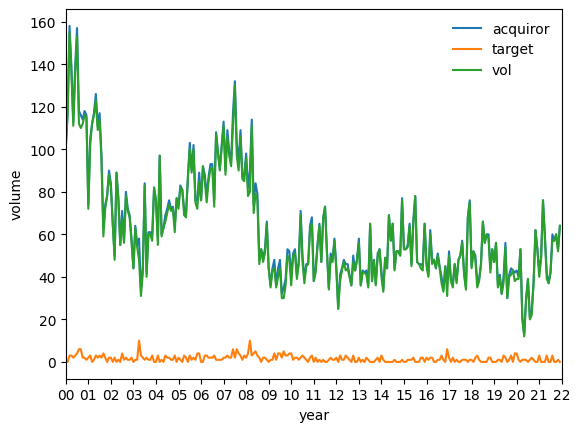

In [40]:
ax = plt.gca()
ax.plot(acquiror_uk.index.values.astype(str), acquiror_uk.vol, label='acquiror')
ax.plot(target_uk.index.values.astype(str), target_uk.vol, label='target')
ax.plot(net_vol_monthly.index.values.astype(str), net_vol_monthly.vol, label='vol')
ax.set_xticks([])
ax.legend(frameon=False)
ax.set_xticks(ticks=range(0, 265, 12), labels=[str(i).zfill(2) for i in range(0, 23, 1)])
ax.set_xlim(0, 264)
ax.set_ylabel('volume')
ax.set_xlabel('year');

## GDP

In [42]:
gdp_quarter = read_gdp()
until = '2022-01'
gdp_quarter['Date'] = gdp_quarter['Date'].dt.to_period('M')
gdp_quarter = gdp_quarter[gdp_quarter['Date'] < until]
gdp_quarter

,Date,UK_GDP
0,2000-02,403407.0
1,2000-05,406049.0
2,2000-08,408120.0
3,2000-11,409871.0
4,2001-02,413381.0
...,...,...
83,2020-11,509621.0
84,2021-02,503663.0
85,2021-05,536608.0
86,2021-08,546084.0


In [43]:
res = []
for i in range(int(len(net_vol_monthly)/3)):
    s = net_vol_monthly[3*i: 3*(i+1)]
    res.append(s.vol.sum())
gdp_quarter['vol'] = res
gdp_quarter

,Date,UK_GDP,vol
0,2000-02,403407.0,373
1,2000-05,406049.0,383
2,2000-08,408120.0,375
3,2000-11,409871.0,343
4,2001-02,413381.0,286
...,...,...,...
83,2020-11,509621.0,152
84,2021-02,503663.0,165
85,2021-05,536608.0,135
86,2021-08,546084.0,156


## Variables

In [44]:
until = '2022-01'
var_monthly = read_variable_monthly()
var_monthly['Date'] = var_monthly['Date'].dt.to_period('M')
var_monthly = var_monthly[var_monthly['Date'] < until]

res = {'EXUSUK': [], 'Interest_Rate': [], 'SMI': []}
for i in range(int(len(var_monthly)/3)):
    s = var_monthly[3*i: 3*(i+1)]
    res['EXUSUK'].append(s.EXUSUK.mean())
    res['Interest_Rate'].append(s['Interest_Rate'].mean())
    res['SMI'].append(s.SMI.mean())
gdp_quarter['EXUSUK'] = res['EXUSUK']
gdp_quarter['Interest_Rate'] = res['Interest_Rate']
gdp_quarter['SMI'] = res['SMI']
gdp_quarter

,Date,UK_GDP,vol,EXUSUK,Interest_Rate,SMI
0,2000-02,403407.0,373,1.606767,5.916667,1241.948000
1,2000-05,406049.0,383,1.533500,6.000000,1193.004000
2,2000-08,408120.0,375,1.476700,6.000000,1181.404333
3,2000-11,409871.0,343,1.446433,6.000000,1121.388000
4,2001-02,413381.0,286,1.458167,5.833333,1112.460333
...,...,...,...,...,...,...
83,2020-11,509621.0,152,1.320400,0.100000,911.964667
84,2021-02,503663.0,165,1.379033,0.100000,1045.408667
85,2021-05,536608.0,135,1.398467,0.100000,1131.969000
86,2021-08,546084.0,156,1.377900,0.100000,1151.498333


# Regression

In [46]:
x_index = ['EXUSUK', 'Interest_Rate', 'SMI', 'UK_GDP']
y_index = ['vol']

data = gdp_quarter
sep = '2016-6'
data_before = gdp_quarter[gdp_quarter.Date < sep]
data_after = gdp_quarter[gdp_quarter.Date > sep]

X_train, Y_train = df_to_XY(data_before, xkeys=x_index, ykeys=y_index)
X_train = sm.add_constant(X_train)
X_test, Y_test = df_to_XY(data_after, xkeys=x_index, ykeys=y_index)
X_test = sm.add_constant(X_test)

model_before = LinearRegression().fit(X_train, Y_train)
model_after = LinearRegression().fit(X_test, Y_test)

model_before.score(X_train, Y_train), model_after.score(X_test, Y_test)

(0.8851251252423745, 0.4834364945013151)

In [47]:
model_before.coef_

array([[ 0.00000000e+00, -1.53951589e+02,  2.52998083e+01,
         2.00656937e-01, -5.73159151e-04]])

In [48]:
model_before.intercept_

array([421.25353795])

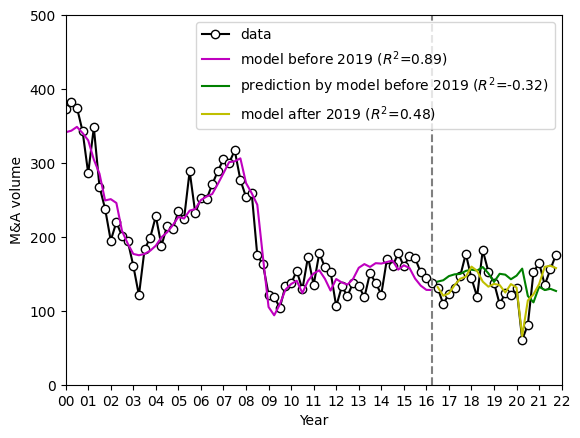

In [49]:
ax = plt.gca()

x_data = data.Date.astype(str)
ax.plot(x_data, data.vol, marker='o', color='k', mfc='white', ls='-', label='data')

Y_train_pred = model_before.predict(X_train)
x_data_before = data_before.index
r = r2_score(Y_train, Y_train_pred,)
ax.plot(x_data_before, Y_train_pred, color='m',
        label=f'model before 2019 ($R^2$={round(r, 2)})')

x_data_after = data_after.index
Y_test_pred = model_before.predict(X_test)
r = r2_score(Y_test, Y_test_pred)
ax.plot(x_data_after, Y_test_pred, color='g',
        label=f'prediction by model before 2019 ($R^2$={round(r, 2)})')

Y_test_pred = model_after.predict(X_test)
r = r2_score(Y_test, Y_test_pred)
ax.plot(x_data_after, Y_test_pred, color='y',
        label=f'model after 2019 ($R^2$={round(r, 2)})')

ax.axvline(65, ls='--', color='gray')
plt.xticks(ticks=range(0, 89, 4), labels=[str(i).zfill(2) for i in range(0, 23, 1)])
ax.set_xlim(0, 88)
ax.set_ylabel('M&A net volume')
ax.set_xlabel('Year')
ax.set_ylim(0, 500)
ax.legend(loc=0, frameon=True);

In [52]:
multi_model = sm.OLS(Y_train, X_train).fit()

eval_env: 1


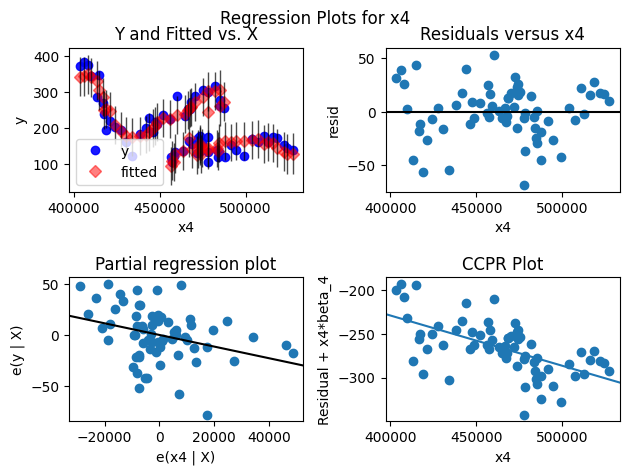

In [53]:
fig = sm.graphics.plot_regress_exog(multi_model, 4)

In [54]:
print(multi_model.summary())
# ['EXUSUK', 'Interest_Rate', 'SMI', 'UK_GDP']

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           6.08e-28
Time:                        22:30:07   Log-Likelihood:                -304.92
No. Observations:                  66   AIC:                             619.8
Df Residuals:                      61   BIC:                             630.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        421.2535     80.401      5.239      0.0

In [114]:
sm.add_constant(X_train)

array([[1.00000000e+00, 1.60676667e+00, 5.91666667e+00, 1.24194800e+03,
        4.03407000e+05],
       [1.00000000e+00, 1.53350000e+00, 6.00000000e+00, 1.19300400e+03,
        4.06049000e+05],
       [1.00000000e+00, 1.47670000e+00, 6.00000000e+00, 1.18140433e+03,
        4.08120000e+05],
       [1.00000000e+00, 1.44643333e+00, 6.00000000e+00, 1.12138800e+03,
        4.09871000e+05],
       [1.00000000e+00, 1.45816667e+00, 5.83333333e+00, 1.11246033e+03,
        4.13381000e+05],
       [1.00000000e+00, 1.42110000e+00, 5.33333333e+00, 1.02155933e+03,
        4.14894000e+05],
       [1.00000000e+00, 1.43860000e+00, 5.00000000e+00, 9.87710667e+02,
        4.16803000e+05],
       [1.00000000e+00, 1.44233333e+00, 4.16666667e+00, 9.16732667e+02,
        4.17480000e+05],
       [1.00000000e+00, 1.42596667e+00, 4.00000000e+00, 9.38210000e+02,
        4.18930000e+05],
       [1.00000000e+00, 1.46213333e+00, 4.00000000e+00, 9.46377667e+02,
        4.21133000e+05],
       [1.00000000e+00, 1.5498

In [125]:
multi_model.model.exog

array([[1.00000000e+00, 1.60676667e+00, 5.91666667e+00, 1.24194800e+03,
        4.03407000e+05],
       [1.00000000e+00, 1.53350000e+00, 6.00000000e+00, 1.19300400e+03,
        4.06049000e+05],
       [1.00000000e+00, 1.47670000e+00, 6.00000000e+00, 1.18140433e+03,
        4.08120000e+05],
       [1.00000000e+00, 1.44643333e+00, 6.00000000e+00, 1.12138800e+03,
        4.09871000e+05],
       [1.00000000e+00, 1.45816667e+00, 5.83333333e+00, 1.11246033e+03,
        4.13381000e+05],
       [1.00000000e+00, 1.42110000e+00, 5.33333333e+00, 1.02155933e+03,
        4.14894000e+05],
       [1.00000000e+00, 1.43860000e+00, 5.00000000e+00, 9.87710667e+02,
        4.16803000e+05],
       [1.00000000e+00, 1.44233333e+00, 4.16666667e+00, 9.16732667e+02,
        4.17480000e+05],
       [1.00000000e+00, 1.42596667e+00, 4.00000000e+00, 9.38210000e+02,
        4.18930000e+05],
       [1.00000000e+00, 1.46213333e+00, 4.00000000e+00, 9.46377667e+02,
        4.21133000e+05],
       [1.00000000e+00, 1.5498

In [126]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(multi_model.resid, multi_model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 4.587680800405614),
 ('p-value', 0.3322770329924994),
 ('f-value', 1.1392198359876913),
 ('f p-value', 0.3466300900114878)]